# California Housing

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Προετοιμασία δεδομένων

In [ ]:
# Load dataset (X:inputs/features, Y:target)
ds_X, ds_Y = fetch_california_housing(return_X_y=True)

# Split features into training/test sets
ds_X_train = ds_X[:-4000]
ds_X_test = ds_X[-4000:]

# Split targets into training/test sets
ds_Y_train = ds_Y[:-4000]
ds_Y_test = ds_Y[-4000:]

# Initialize linear regression object
regr = linear_model.LinearRegression()

# Construct model using the training sets
regr.fit(ds_X_train, ds_Y_train)

# Produce predictions using the test set
ds_Y_pred = regr.predict(ds_X_test)

# Output learned model coefficients
print("Intercept: \n", regr.intercept_)
print("Coefficients: \n", regr.coef_)

# Output mean squared prediction error
print("Mean square prediction error: %.2f" % mean_squared_error(ds_Y_test, ds_Y_pred))

Intercept: 
 -36.308638344599295
Coefficients: 
 [ 4.47711234e-01  9.40915756e-03 -1.20802393e-01  7.09551707e-01
 -1.82577993e-06 -8.83342492e-03 -4.21683195e-01 -4.29077083e-01]
Mean square prediction error: 0.50


# A) R-Squared

In [ ]:
#Calculate R-squared
R_squared = r2_score(ds_Y_test, ds_Y_pred)
print("R-squared:",R_squared)

R-squared: 0.6616437502497786


# B) Γράφημα Επιδράσεων effect plot

In [ ]:
#Split ds_X_test into its 8 components for easier graph creation
MedInc = ds_X_test[:,0]
HouseAge = ds_X_test[:,1]
AveRooms = ds_X_test[:,2]
AveBedrms = ds_X_test[:,3]
Population = ds_X_test[:,4]
AveOccup = ds_X_test[:,5]
Latitude = ds_X_test[:,6]
Longitude = ds_X_test[:,7]

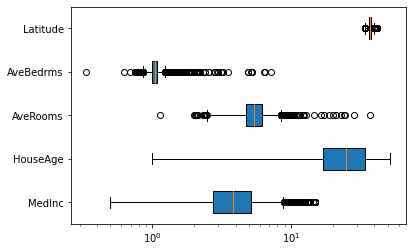

In [ ]:
# Creating plot
plt.boxplot([MedInc,HouseAge,AveRooms,AveBedrms,Latitude],vert=False,patch_artist=True)
plt.yticks([1,2,3,4,5], ['MedInc','HouseAge','AveRooms','AveBedrms','Latitude'])#Change labels of y-axis
plt.semilogx()#Make a plot with log scaling on the x-axis
plt.show()

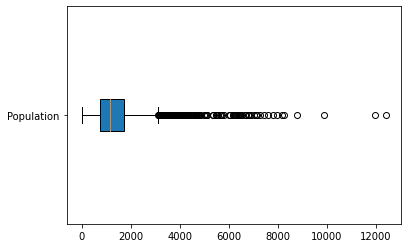

In [ ]:
# Creating plot
plt.boxplot([Population],vert=False,patch_artist=True)
plt.yticks([1], ['Population'])#Change labels of y-axis
plt.show()

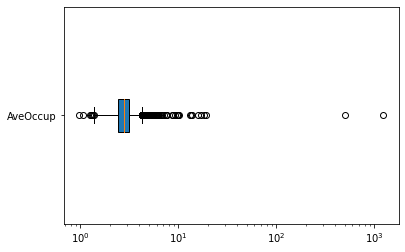

In [ ]:
# Creating plot
plt.boxplot([AveOccup],vert=False,patch_artist=True)
plt.yticks([1], ['AveOccup'])#Change labels of y-axis
plt.semilogx()#Make a plot with log scaling on the x-axis
plt.show()

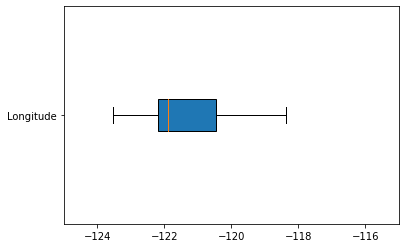

In [ ]:
# Creating plot
plt.boxplot([Longitude],vert=False,patch_artist=True)
plt.yticks([1], ['Longitude'])#Change labels of y-axis
plt.xlim([-125,-115])#Set limits on the x-axis
plt.show()

# C) Τυχαία επιλεγμένο δείγμα από το σύνολο αξιολόγηση ‘ds_X_test’

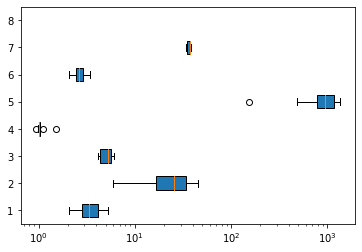

In [ ]:
# Get 10 random samples from ds_X_test
sample = ds_X_test[np.random.choice(ds_X_test.shape[0], 10, replace=False), :]

# Creating plot
plt.boxplot(sample,vert=False,patch_artist=True)
plt.semilogx()#Make a plot with log scaling on the x-axis
plt.show()

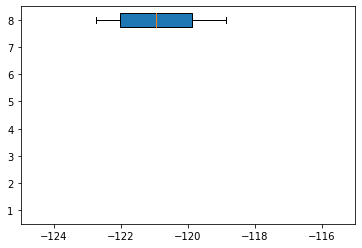

In [ ]:
# Creating plot
plt.boxplot(sample,vert=False,patch_artist=True)
plt.xlim([-125,-115])#Set limits on the x-axis
plt.show()

# Diabetes

# Imports

In [ ]:
#Import SHAP and XGBoost method libraries
!pip install shap
import xgboost
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.8 MB/s eta 0:00:00


# Προετοιμασία δεδομένων

[15:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


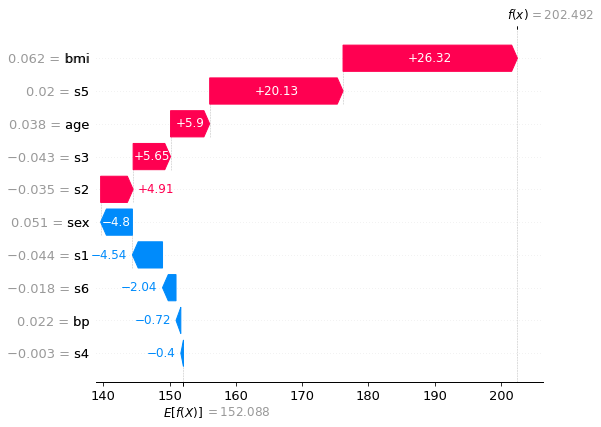

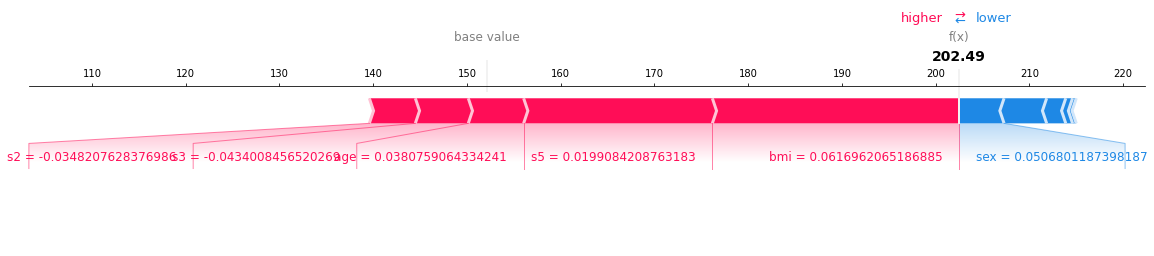

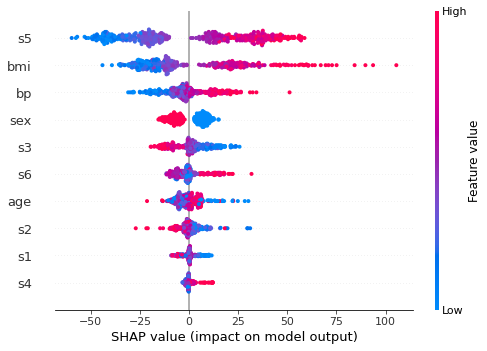

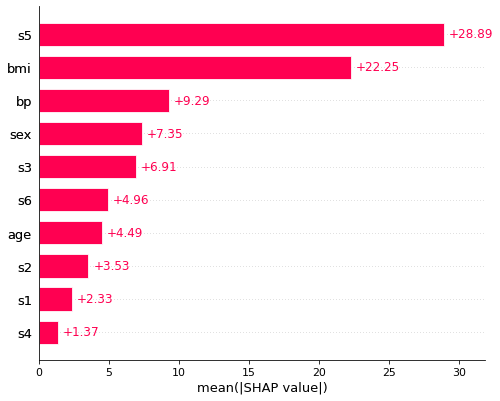

In [ ]:
#Import diabetes dataset
ds_X, ds_Y = shap.datasets.diabetes()

#Train an XGBoost regression model
model = xgboost.XGBRegressor().fit(ds_X, ds_Y)

#Estimate the SHAP values for each dataset sample
explainer = shap.Explainer(model)
shap_values = explainer(ds_X)

#Define the index of the examined sample for generating local explanations
sample_indx=0

#Visualize sample SHAP values for given example (local explanation)
shap.plots.waterfall(shap_values[sample_indx])

#Visualize (SHAP-based) sample force plot for given example (local explanation)
shap.initjs()
shap.plots.force(shap_values[sample_indx], matplotlib=True)

#Visualize (SHAP-based) summary plot of the effects of all features for all dataset samples (global explanation)
shap.initjs()
shap.plots.beeswarm(shap_values)

#Visualize mean absolute value of SHAP values for each feature for all dataset samples (global explanation)
shap.initjs()
shap.plots.bar(shap_values)

#Visualize interactive (SHAP-based) force plot for all samples in the dataset (global explanation)
shap.initjs()
shap.plots.force(shap_values)

# D) Γράφημα τιμών Shapley

In [ ]:
#Take a random shap_value from range 0-441(max samples=442)
import random
sample = shap_values[random.randint(0,441),:]

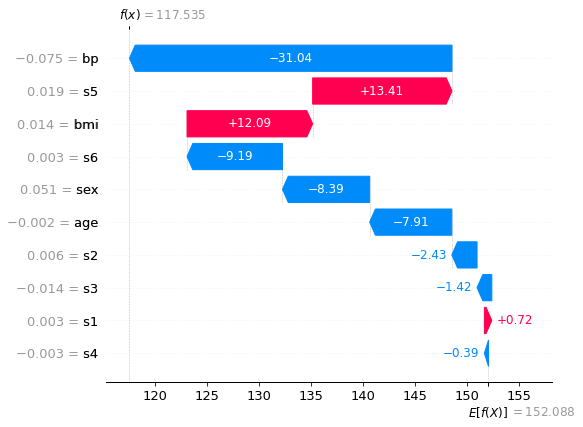

In [ ]:
shap.initjs()
shap.plots.waterfall(sample)

# E) Γράφημα δύναμης

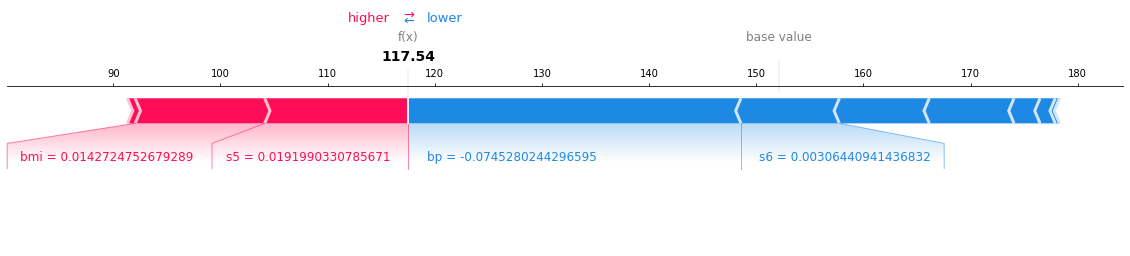

In [ ]:
shap.initjs()
shap.plots.force(sample, matplotlib=True)

# F) Γράφημα περίληψης

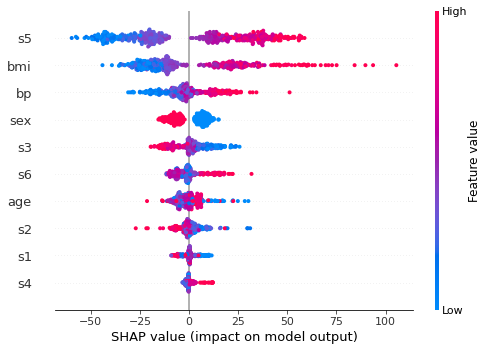

In [ ]:
shap.initjs()
shap.plots.beeswarm(shap_values)

# G) Γράφημα μέσης απόλυτης τιμής των τιμών Shapley

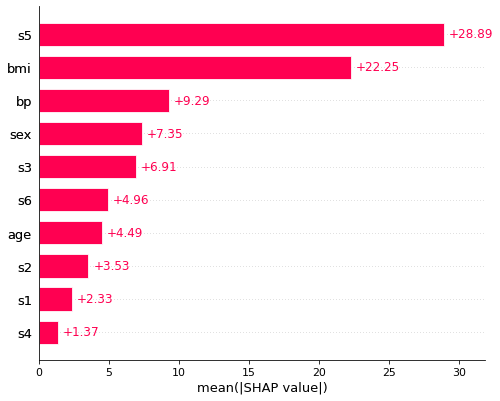

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)

# H) Διαδραστικό γράφημα δύναμης για το σύνολο των δειγμάτων

In [ ]:
shap.initjs()
shap.plots.force(shap_values)